In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
N = 1000
X = np.random.random((N,2)) * 6 -3
X

array([[-1.18350751, -0.15800483],
       [ 0.43224465, -1.53967825],
       [-1.21893418,  1.51295014],
       ...,
       [ 2.77894413,  0.72919733],
       [-1.83388821,  2.47163105],
       [ 1.81446003, -2.50341529]])

In [7]:
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])
Y[:6]

array([ 0.1750265 ,  0.55581003, -0.93510647,  1.25736328, -0.18607609,
        1.52435325])

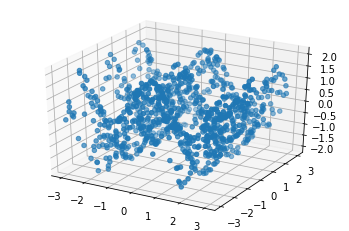

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show();

In [10]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
                                    tf.keras.layers.Dense(1)
])

In [11]:
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r=model.fit(X,Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9827
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9544
Epoch 3/100
32/32 [==============================] - 0s 933us/step - loss: 0.9191
Epoch 4/100
32/32 [==============================] - 0s 978us/step - loss: 0.8937
Epoch 5/100
32/32 [==============================] - 0s 917us/step - loss: 0.8318
Epoch 6/100
32/32 [==============================] - 0s 967us/step - loss: 0.8173
Epoch 7/100
32/32 [==============================] - 0s 936us/step - loss: 0.7214
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6989
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6350
Epoch 10/100
32/32 [==============================] - 0s 998us/step - loss: 0.5676
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5856
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5709
Epoch 13/100
32/32 [=====

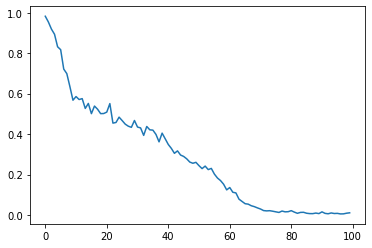

In [12]:
plt.plot(r.history['loss'], label='loss')

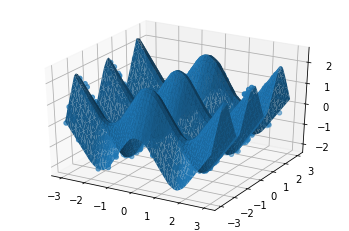

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y);

line = np.linspace(-3, +3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid=np.vstack((xx.flatten(), yy.flatten())).T

yhat = model.predict(Xgrid).flatten()

ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], yhat, linewidth=0.2, antialiased=True)
plt.show();

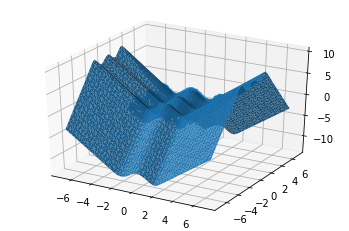

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y);

line = np.linspace(-7, +7, 50)
xx, yy = np.meshgrid(line, line)
Xgrid=np.vstack((xx.flatten(), yy.flatten())).T

yhat = model.predict(Xgrid).flatten()

ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], yhat, linewidth=0.2, antialiased=True)
plt.show();